In [ ]:
#Import all necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer churn capastone project/CC_without_outlier (1).csv")

In [ ]:
df.head(5)

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,Cashback,...,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,Churn,Clusters
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,160.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,2
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,121.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,2
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,126.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,134.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,2
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,130.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,2


## VIF Test

### Iteration 1

In [ ]:
X = df.drop(['Churn'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 23:
        print (column ,"--->",  vif[i])
        i = i+1

Tenure ---> 3.1298841307374574
City_Tier ---> 5.98202718076169
CC_Contacted_LY ---> 10.900118090756298
Service_Score ---> 21.554586447824388
User_Count ---> 16.202203532456483
CC_Score ---> 5.811915179867945
Rev_Permonth ---> 4.661740883224694
Complain_LY ---> 1.4073654822571693
Days_Since_CC ---> 3.623665513676849
Cashback ---> 50.393240061638345
Payment_Creditcard ---> 4.010148729757916
Payment_Debitcard ---> 4.909660619267567
Payment_Ewallet ---> 2.4717647493391044
Payment_UPI ---> 1.7125549002005591
Gender_Male ---> 2.462686512655284
ACSegment_Regular ---> 1.7520237675546821
ACSegment_Regularplus ---> 5.105549771844142
ACSegment_Super ---> 3.6169353555293973
ACSegment_Superplus ---> 1.950229907286433
Maritalstatus_Married ---> 3.9773018291047295
Maritalstatus_Single ---> 2.8271882534995556
Logindevice_Mobile ---> 2.988631741580302
Clusters ---> 7.805375155991024


### Iteration 2

In [ ]:
X = df.drop(['Churn','Cashback'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 22:
        print (column ,"--->",  vif[i])
        i = i+1

Tenure ---> 3.0623082418474676
City_Tier ---> 5.787928925946699
CC_Contacted_LY ---> 9.27726760579588
Service_Score ---> 18.818904005710642
User_Count ---> 14.768187419573739
CC_Score ---> 5.700508249790638
Rev_Permonth ---> 4.584432140706558
Complain_LY ---> 1.4024849406089572
Days_Since_CC ---> 3.3107983699184174
Payment_Creditcard ---> 3.8699924968435124
Payment_Debitcard ---> 4.7451774537414195
Payment_Ewallet ---> 2.463240386132487
Payment_UPI ---> 1.6844882475773921
Gender_Male ---> 2.4553649551011674
ACSegment_Regular ---> 1.3655066579880606
ACSegment_Regularplus ---> 3.8034515999902445
ACSegment_Super ---> 3.233356072611254
ACSegment_Superplus ---> 1.5534281148631182
Maritalstatus_Married ---> 3.878732670585294
Maritalstatus_Single ---> 2.780267175643399
Logindevice_Mobile ---> 2.945345913032812
Clusters ---> 6.580851814494557


### Iteration 3

In [ ]:
X = df.drop(['Churn','Cashback', 'Service_Score'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 21:
        print (column ,"--->",  vif[i])
        i = i+1

Tenure ---> 3.048141990039205
City_Tier ---> 5.7522908577293865
CC_Contacted_LY ---> 8.88812974804752
User_Count ---> 12.348465272656178
CC_Score ---> 5.6536945819214655
Rev_Permonth ---> 4.494076626172691
Complain_LY ---> 1.4009747544654194
Days_Since_CC ---> 3.133109455086589
Payment_Creditcard ---> 3.8453745294951642
Payment_Debitcard ---> 4.704929702310876
Payment_Ewallet ---> 2.460685585135849
Payment_UPI ---> 1.6829406559754343
Gender_Male ---> 2.453599851092899
ACSegment_Regular ---> 1.3653135070400093
ACSegment_Regularplus ---> 3.7237548819134
ACSegment_Super ---> 3.2149655579230796
ACSegment_Superplus ---> 1.5532325476499709
Maritalstatus_Married ---> 3.86286302036967
Maritalstatus_Single ---> 2.780249400241607
Logindevice_Mobile ---> 2.9369385811489024
Clusters ---> 6.389921235970821


### Iteration 4

In [ ]:
X = df.drop(['Churn','Cashback', 'Service_Score', 'Clusters'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 20:
        print (column ,"--->",  vif[i])
        i = i+1

Tenure ---> 3.0190707701336845
City_Tier ---> 5.600240749081224
CC_Contacted_LY ---> 5.070569405647767
User_Count ---> 11.49203439593503
CC_Score ---> 5.450479915106577
Rev_Permonth ---> 4.389704361922852
Complain_LY ---> 1.39579730765108
Days_Since_CC ---> 2.9992021680509438
Payment_Creditcard ---> 3.6250341501297663
Payment_Debitcard ---> 4.4213352253617435
Payment_Ewallet ---> 2.416058621356596
Payment_UPI ---> 1.6416082900520266
Gender_Male ---> 2.41438455959847
ACSegment_Regular ---> 1.3590303040058587
ACSegment_Regularplus ---> 3.276993579706394
ACSegment_Super ---> 3.0940443676349134
ACSegment_Superplus ---> 1.5347018384614015
Maritalstatus_Married ---> 3.8065406745448263
Maritalstatus_Single ---> 2.714595096933338
Logindevice_Mobile ---> 2.905148897131583


### Iteration 5

In [ ]:
X = df.drop(['Churn','Cashback', 'Service_Score', 'Clusters', 'User_Count'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 19:
        print (column ,"--->",  round(vif[i],0))
        i = i+1


Tenure ---> 3.0
City_Tier ---> 5.0
CC_Contacted_LY ---> 5.0
CC_Score ---> 5.0
Rev_Permonth ---> 4.0
Complain_LY ---> 1.0
Days_Since_CC ---> 3.0
Payment_Creditcard ---> 4.0
Payment_Debitcard ---> 4.0
Payment_Ewallet ---> 2.0
Payment_UPI ---> 2.0
Gender_Male ---> 2.0
ACSegment_Regular ---> 1.0
ACSegment_Regularplus ---> 3.0
ACSegment_Super ---> 3.0
ACSegment_Superplus ---> 2.0
Maritalstatus_Married ---> 4.0
Maritalstatus_Single ---> 3.0
Logindevice_Mobile ---> 3.0


 After removing 4 variables apart from target variable, the VIF for all the variables has come to <=5. These 4 variables will be dropped from predictor variable list before modelling. However, User_Count had a significant Chi square value, hence that variable is retained. Hence only 3 variables will be removed before modelling.

In [ ]:
VIF_drop = ['Cashback', 'Service_Score', 'Clusters']

In [ ]:
df.shape

(11260, 24)

In [ ]:
df_bkup = df.copy()

In [ ]:
df.drop(VIF_drop, axis=1, inplace=True)

In [ ]:
df.shape

(11260, 21)

## Train-Test Split

In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop(['Churn'], axis=1)

# Copy target into the y dataframe.
y = df['Churn']

In [ ]:
df.shape

(11260, 21)

In [ ]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7882, 20), (3378, 20), (7882,), (3378,))

In [ ]:
y_train.value_counts(1), y_test.value_counts(1)

(Churn
 0    0.831642
 1    0.168358
 Name: proportion, dtype: float64,
 Churn
 0    0.831557
 1    0.168443
 Name: proportion, dtype: float64)

In [ ]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

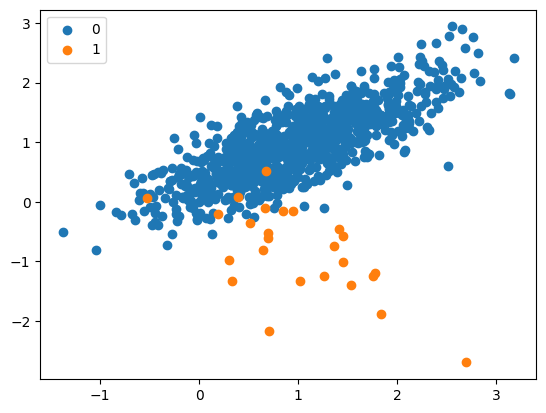

In [ ]:
from collections import Counter
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### Performing SMOTE to Balanced data

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
#checking the dimentsions of training and test data
print('X_train_res',X_train_res.shape)
#print('X_test',X_test.shape)
print('y_train_res',y_train_res.shape)

X_train_res (13110, 20)
y_train_res (13110,)


In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

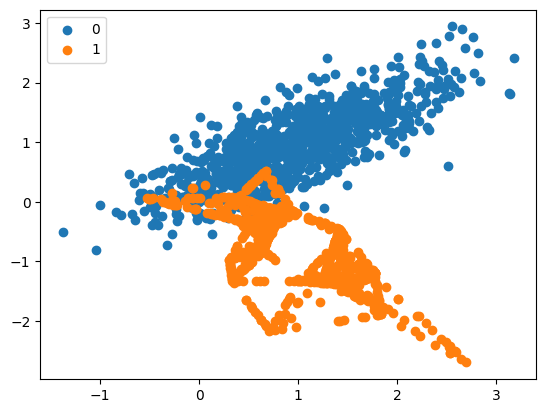

In [ ]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## Model Evaluation Function

In [ ]:
def model_eval(model,xtrue,ytrue,ypred,probs):

    roc_curve(model,xtrue,ytrue,color='red')
    plt.plot([0, 1], [0, 1], linestyle='--');

    print('Accuracy : ', model.score(xtrue, ytrue))

    confusion_matrix(model,xtrue,ytrue, colorbar=False);

    print(classification_report(ytrue, ypred));

    # # calculate AUC
    auc = roc_auc_score(ytrue, probs)
    print('AUC: %.3f' % auc);


## Logistic Regression Model SKLearn

### LR_model1 : Base model with outlier treated unscaled data

In [ ]:
# building Logistic regression model
# Fit the model on original data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Fit the Logistic Regression model
lg = LogisticRegression(random_state=1)
lg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
#predict on train and test data set
ytrain_predict_lg = lg.predict(X_train) # can compare with y_train
ytest_predict_lg = lg.predict(X_test) # can compare with y_test

In [ ]:
#Accuracy - Training Data
print("Accuracy of training dataset:",lg.score(X_train, y_train))

Accuracy of training dataset: 0.8920324790662268


In [ ]:
# Accuracy - Test Data
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.8913558318531676


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
# confusion matrix for train data set
print("Confusion Matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_lg)

Confusion Matrix for train dataset


array([[6358,  197],
       [ 654,  673]])

In [ ]:
# confusion matrix for test data set
print("Confusion Matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lg)

Confusion Matrix for test dataset


array([[2729,   80],
       [ 287,  282]])

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix

In [ ]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lg))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.77      0.51      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.77      7882
weighted avg       0.88      0.89      0.88      7882



In [ ]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lg))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.50      0.61       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



AUC score and ROC curve for training dataset
AUC: 0.884


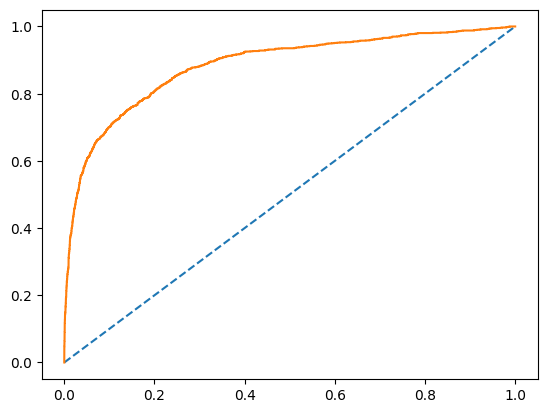

In [ ]:
# predict probabilities
probs = lg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.884


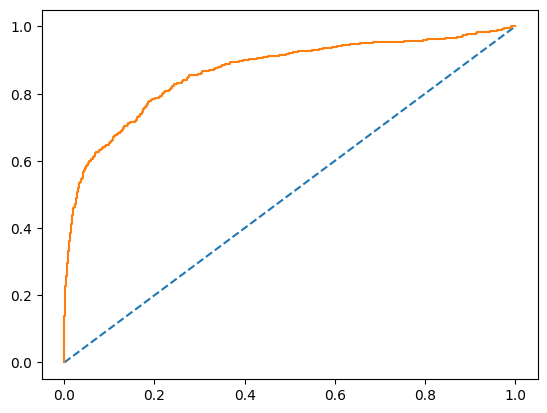

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
from sklearn.model_selection import cross_val_score
print("cross validation scroes for traning dataset")
scores_lg_train = cross_val_score(lg, X_train, y_train, cv=10)
scores_lg_train

cross validation scroes for traning dataset


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.878327  , 0.90240811, 0.88832487, 0.8857868 , 0.88451777,
       0.88705584, 0.87436548, 0.89974619, 0.89467005, 0.90482234])

In [ ]:
print("cross validation scores for testing dataset")
scores_lg_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lg_test

cross validation scores for testing dataset


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.92011834, 0.84615385, 0.87573964, 0.90828402, 0.89349112,
       0.87573964, 0.88757396, 0.8964497 , 0.88724036, 0.89317507])

# Hyperparameter Tuning

In [ ]:
# loading GridSearchCV and creating dataframe for parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1','l2','none'],
    'tol':[0.0001,0.00001]
}

grid_search = GridSearchCV(estimator = lg, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [ ]:
# fitting grid search into traing dataset
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [ ]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}

In [ ]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [ ]:
# predicting training and testing dataset
ytrain_predict_lgcv = best_grid.predict(X_train)
ytest_predict_lgcv = best_grid.predict(X_test)

In [ ]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8903831514843948


In [ ]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8904677323860273


In [ ]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lgcv))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.77      0.50      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.73      0.77      7882
weighted avg       0.88      0.89      0.88      7882



In [ ]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lgcv))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [ ]:
# confusion matrix of train dataset
print("confusion matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_lgcv)

confusion matrix for train dataset


array([[6356,  199],
       [ 665,  662]])

In [ ]:
# confusion matrix of train dataset
print("confusion matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lgcv)

confusion matrix for test dataset


array([[2728,   81],
       [ 289,  280]])

AUC score and ROC curve for training dataset
AUC: 0.884


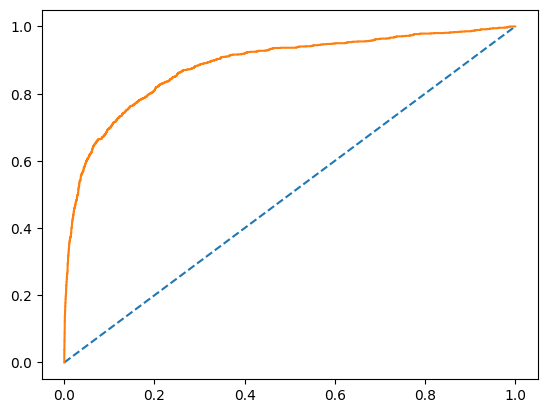

In [ ]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.867


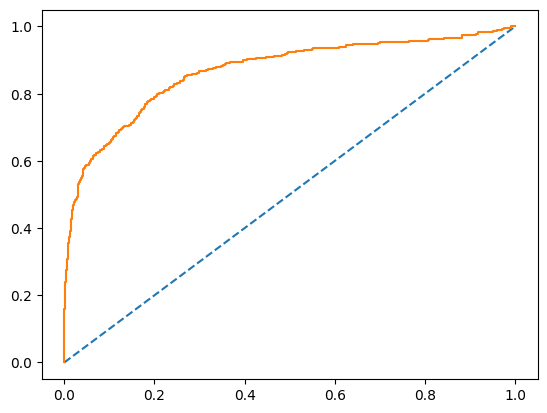

In [ ]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation score for training dataset")
scores_lgcv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_lgcv_train

cross validation score for training dataset


array([0.87959442, 0.89987326, 0.88705584, 0.89213198, 0.8857868 ,
       0.88832487, 0.87436548, 0.89974619, 0.89593909, 0.90482234])

In [ ]:
print("cross calidation score for testing dataset")
scores_lgcv_test = cross_val_score(best_grid, X_test, y_test, cv=10)
scores_lgcv_test

cross calidation score for testing dataset


array([0.91420118, 0.84911243, 0.87573964, 0.90828402, 0.8964497 ,
       0.87573964, 0.88757396, 0.89940828, 0.884273  , 0.90207715])

# Building Logistic regression model using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
#fitting model into training dataset
lg.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
# predict on train and test data set with balanced dataset
ytrain_predict_lgsm = lg.predict(X_train_res) # can compare with y_train
ytest_predict_lgsm = lg.predict(X_test)

In [ ]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",lg.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.8093058733790999


In [ ]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.7948490230905861


In [ ]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_lgsm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6555
           1       0.80      0.82      0.81      6555

    accuracy                           0.81     13110
   macro avg       0.81      0.81      0.81     13110
weighted avg       0.81      0.81      0.81     13110



In [ ]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lgsm))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2809
           1       0.44      0.79      0.56       569

    accuracy                           0.79      3378
   macro avg       0.69      0.79      0.72      3378
weighted avg       0.86      0.79      0.82      3378



In [ ]:
#confusion matrix for train dataset
print("Confusion matrix for train dataset")
confusion_matrix(y_train_res, ytrain_predict_lgsm)

Confusion matrix for train dataset


array([[5237, 1318],
       [1182, 5373]])

In [ ]:
#confusion matrix for test dataset
print("Confusion matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lgsm)

Confusion matrix for test dataset


array([[2236,  573],
       [ 120,  449]])

AUC score and ROC curve for training dataset
AUC: 0.889


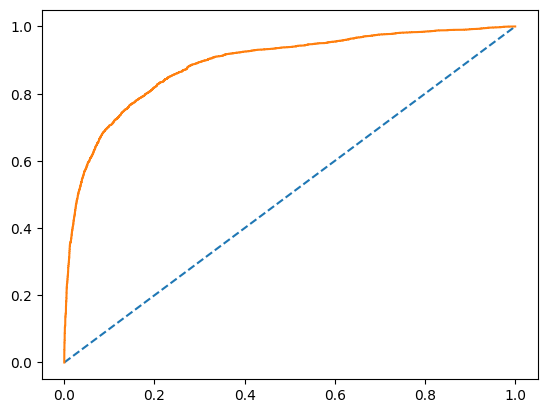

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = lg.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.866


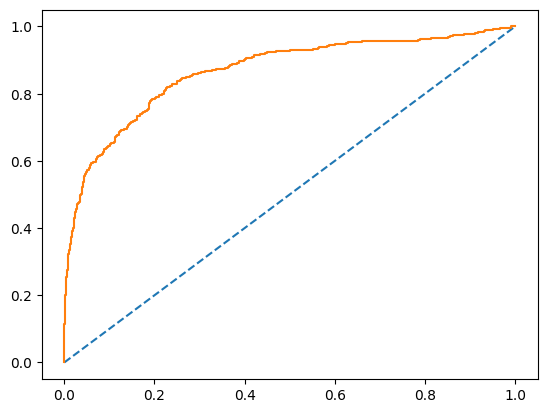

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation score for balanced training dataset")
scores_lgsm_train = cross_val_score(lg, X_train_res, y_train_res, cv=10)
scores_lgsm_train

cross validation score for balanced training dataset


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.80396644, 0.77955759, 0.80625477, 0.8085431 , 0.80396644,
       0.81922197, 0.81998474, 0.79328757, 0.82227307, 0.8215103 ])

In [ ]:
print("cross validation score for testing dataset")
scores_lgsm_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lgsm_test

cross validation score for testing dataset


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.92011834, 0.84615385, 0.87573964, 0.90828402, 0.89349112,
       0.87573964, 0.88757396, 0.8964497 , 0.88724036, 0.89317507])

# Building Linear Discriminant Analysis Model (LDA)

In [ ]:
#building Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#fitting LDA model into training dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda

LinearDiscriminantAnalysis()

In [ ]:
#Training Data Class Prediction
ytrain_predict_lda = lda.predict(X_train)

#Test Data Class Prediction
ytest_predict_lda = lda.predict(X_test)

In [ ]:
#Accuracy - Training dataset
print("Accuracy score of training dataset:",lda.score(X_train, y_train))

Accuracy score of training dataset: 0.8869576249682821


In [ ]:
# Accuracy - Test Data
print("Accuracy score of testing dataset:",lda.score(X_test, y_test))

Accuracy score of testing dataset: 0.8848431024274719


In [ ]:
print("Confusion matrix of training dataset")
confusion_matrix(y_train, ytrain_predict_lda)

Confusion matrix of training dataset


array([[6364,  191],
       [ 700,  627]])

In [ ]:
print("Confusion matrix of testing dataset")
confusion_matrix(y_test, ytest_predict_lda)

Confusion matrix of testing dataset


array([[2731,   78],
       [ 311,  258]])

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.47      0.58      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.77      0.45      0.57       569

    accuracy                           0.88      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.88      0.88      0.87      3378
 



AUC score and ROC curve for training dataset
AUC: 0.866


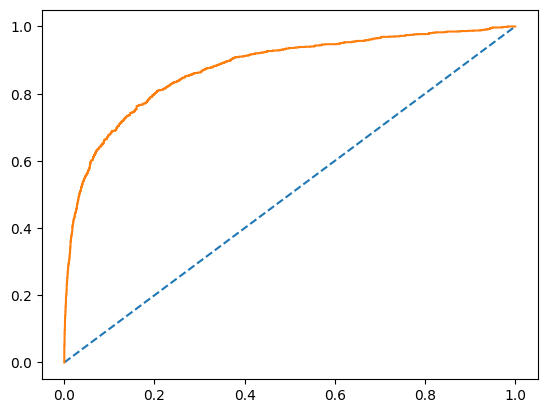

In [ ]:
#creating ROC curve and getting AUC score for train data set
#predict probabilities
probs1 = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
train_auc1 = roc_auc_score(y_train, probs1)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr1, train_tpr1, train_thresholds1 = roc_curve(y_train, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr1, train_tpr1);

AUC score and ROC curve for testing dataset
AUC: 0.866


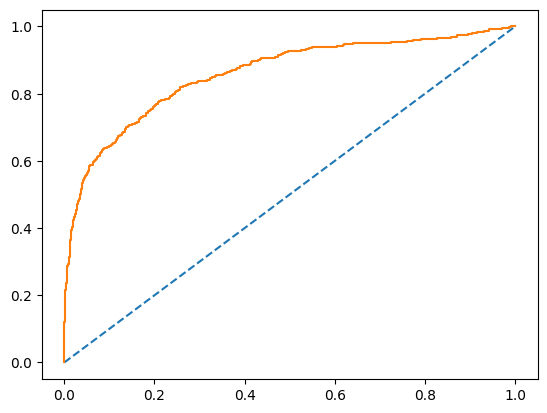

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs2 = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr2, test_tpr2, test_thresholds2 = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(test_fpr2, test_tpr2);

In [ ]:
print("cross validation score for training dataset")
scores_lda_train = cross_val_score(lda, X_train, y_train, cv=10)
scores_lda_train

cross validation score for training dataset


array([0.87325729, 0.89100127, 0.88071066, 0.88832487, 0.87944162,
       0.88324873, 0.87563452, 0.89593909, 0.89340102, 0.90482234])

In [ ]:
print("cross validation score for testing dataset")
scores_lda_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_lda_test

cross validation score for testing dataset


array([0.90236686, 0.84023669, 0.85798817, 0.9112426 , 0.87573964,
       0.87573964, 0.8816568 , 0.88757396, 0.884273  , 0.87537092])

# Building LDA model using GridSearchCV

In [ ]:
# creating dataframe for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol' : [0.0001,0.0002,0.0003],
    'shrinkage' : ['auto', 'float', 'None'],

}

grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [ ]:
# fitting model into training dataset
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 621, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")


GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='f1')

In [ ]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [ ]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [ ]:
# predicting training and testing dataset
ytrain_predict_ldacv = best_grid.predict(X_train)
ytest_predict_ldacv = best_grid.predict(X_test)

In [ ]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.887338239025628


In [ ]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8848431024274719


In [ ]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_ldacv))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.47      0.59      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882



In [ ]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldacv))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.77      0.45      0.57       569

    accuracy                           0.88      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.88      0.88      0.87      3378



In [ ]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, ytrain_predict_ldacv)

confusuon matrix for training dataset


array([[6368,  187],
       [ 701,  626]])

In [ ]:
#confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldacv)

confusuon matrix for testing dataset


array([[2733,   76],
       [ 313,  256]])

AUC score and ROC curve for training dataset
AUC: 0.876


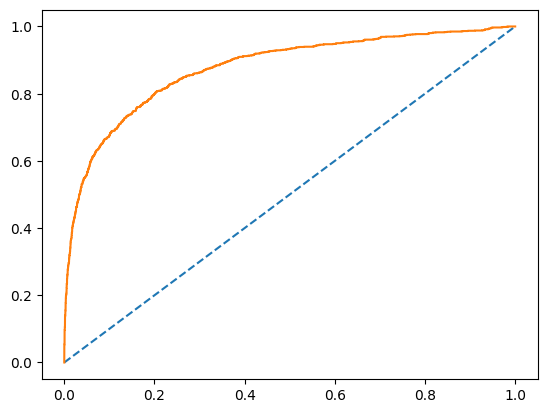

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.858


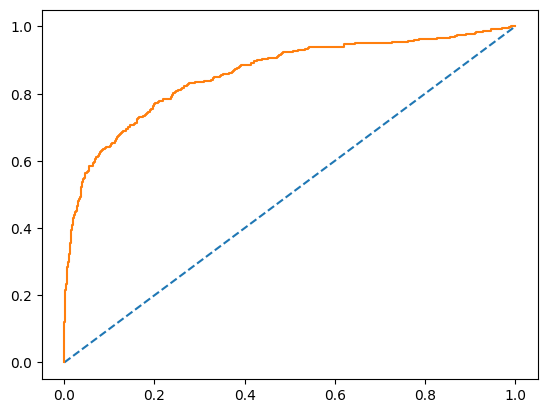

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for training dataset")
scores_ldacv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_ldacv_train

cross validation scores for training dataset


array([0.87452471, 0.88846641, 0.88324873, 0.8857868 , 0.87944162,
       0.8819797 , 0.87817259, 0.89467005, 0.89340102, 0.90482234])

In [ ]:
print("cross validation scores from testing dataset")
scores_ldacv_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldacv_test

cross validation scores from testing dataset


array([0.90236686, 0.84023669, 0.85798817, 0.9112426 , 0.87573964,
       0.87573964, 0.8816568 , 0.88757396, 0.884273  , 0.87537092])

# Building LDA model using SMOTE

In [ ]:
#fitting model into training dataset
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [ ]:
# predict on train and test data set with balanced dataset
ytrain_predict_ldasm = lda.predict(X_train_res) # can compare with y_train
ytest_predict_ldasm = lda.predict(X_test)

In [ ]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",lda.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.8057971014492754


In [ ]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",lda.score(X_test, y_test))

Accuracy of testing dataset: 0.7835997631734755


In [ ]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_ldasm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      6555
           1       0.79      0.83      0.81      6555

    accuracy                           0.81     13110
   macro avg       0.81      0.81      0.81     13110
weighted avg       0.81      0.81      0.81     13110



In [ ]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldasm))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2809
           1       0.42      0.79      0.55       569

    accuracy                           0.78      3378
   macro avg       0.69      0.79      0.70      3378
weighted avg       0.86      0.78      0.81      3378



In [ ]:
#confusion matrix for train dataset
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_ldasm)

confusion matrix for training dataset


array([[5139, 1416],
       [1130, 5425]])

In [ ]:
#confusion matrix for test dataset
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldasm)

confusion matrix for testing dataset


array([[2196,  613],
       [ 118,  451]])

AUC score and ROC curve for training dataset
AUC: 0.888


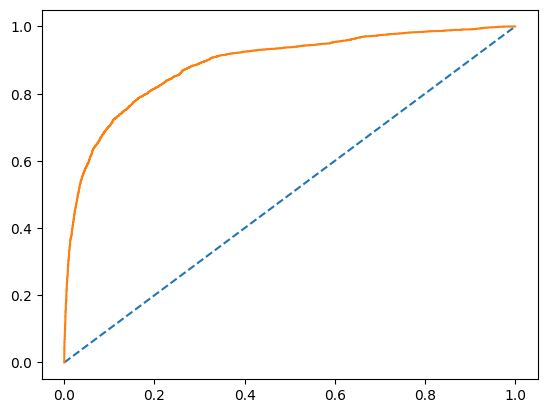

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = lda.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.864


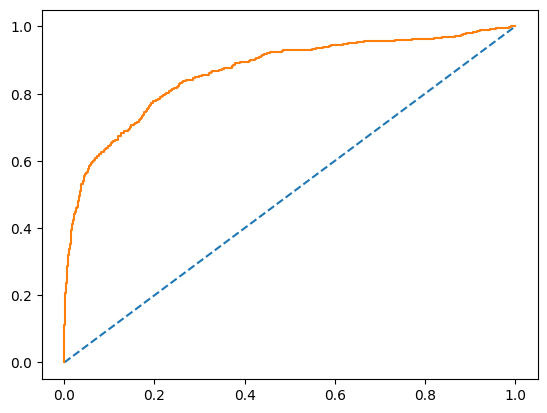

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for training dataset")
scores_ldasm_train = cross_val_score(lda, X_train_res, y_train_res, cv=10)
scores_ldasm_train

cross validation scores for training dataset


array([0.80015256, 0.78108314, 0.80320366, 0.80930587, 0.80472921,
       0.81388253, 0.81617086, 0.78947368, 0.81617086, 0.82227307])

In [ ]:
print("cross validation scores for testing dataset")
scores_ldasm_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldasm_test

cross validation scores for testing dataset


array([0.90236686, 0.84023669, 0.85798817, 0.9112426 , 0.87573964,
       0.87573964, 0.8816568 , 0.88757396, 0.884273  , 0.87537092])

# KNN Model

In [ ]:
# building KNN model using the default hyper-parameter
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
## Performance Matrix on train data set
ytrain_predict_knn = knn.predict(X_train)
print("Accracy of training dataset:", knn.score(X_train, y_train))

Accracy of training dataset: 0.9545800558233951


In [ ]:
print("confusion matrix of training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_knn))

confusion matrix of training dataset
[[6432  123]
 [ 235 1092]]


In [ ]:
print("classificatoin report of training dataset")
print (classification_report(y_train, ytrain_predict_knn))

classificatoin report of training dataset
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6555
           1       0.90      0.82      0.86      1327

    accuracy                           0.95      7882
   macro avg       0.93      0.90      0.92      7882
weighted avg       0.95      0.95      0.95      7882



In [ ]:
#Performance Matrix on test data set
ytest_predict_knn = knn.predict(X_test)
print("accuracy for testing dataset", knn.score(X_test, y_test))

accuracy for testing dataset 0.9177027827116637


In [ ]:
print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_knn))

confusion matrix for testing dataset
[[2715   94]
 [ 184  385]]


In [ ]:
print("classsification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_knn))

classsification report for testing dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2809
           1       0.80      0.68      0.73       569

    accuracy                           0.92      3378
   macro avg       0.87      0.82      0.84      3378
weighted avg       0.91      0.92      0.91      3378



AUC score and ROC curve for training dataset
AUC: 0.986


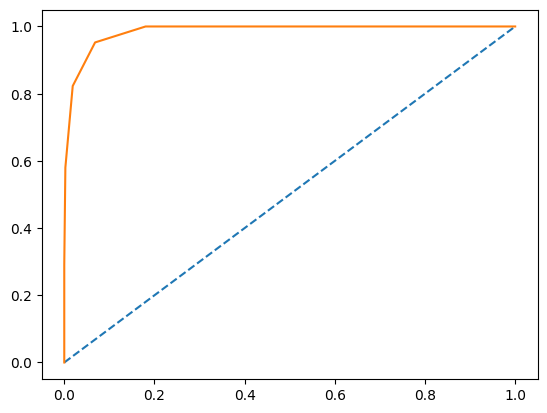

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.941


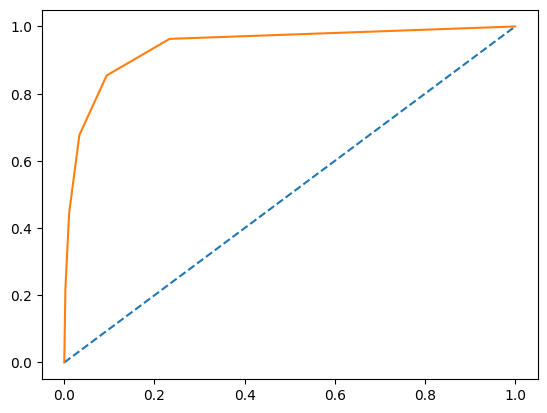

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_knn_train = cross_val_score(knn, X_train, y_train, cv=10)
scores_knn_train

cross validation scores for train dataset


array([0.89607098, 0.92141952, 0.91116751, 0.90989848, 0.91116751,
       0.90609137, 0.90228426, 0.92639594, 0.91243655, 0.91370558])

In [ ]:
print("cross validation scores for test dataset")
scores_knn_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knn_test

cross validation scores for test dataset


array([0.88757396, 0.85798817, 0.85798817, 0.88461538, 0.89349112,
       0.87278107, 0.88461538, 0.88461538, 0.83976261, 0.87240356])

## Tuning KNN with varying values of K

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# empty list that will hold accuracy scores
ac_f1scores = []
ac_scores = []

# perform accuracy metrics for values from 1,3,5....25
for k in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_ytest_pred = knn.predict(X_test)
    # evaluate test f1_score, accuracy
    f1scores = f1_score(y_test, knn_ytest_pred)
    scores = knn.score(X_test, y_test)
    ac_f1scores.append(f1scores)
    ac_scores.append(scores)

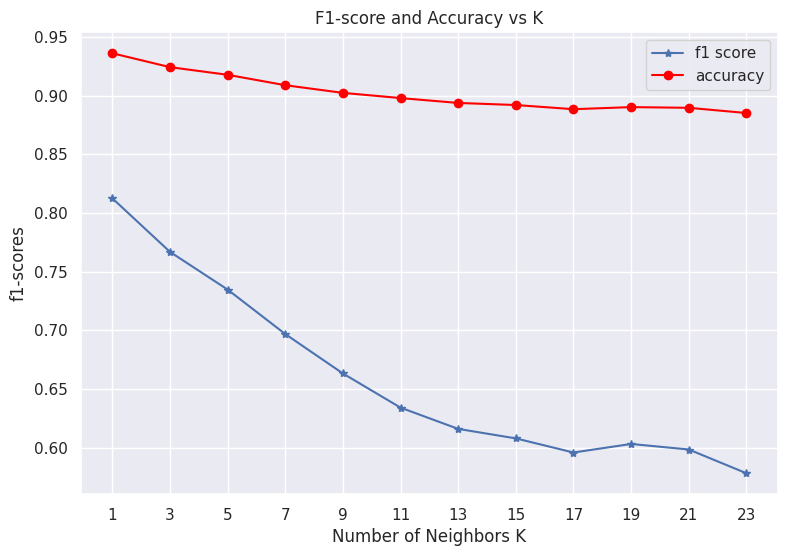

In [ ]:
## Plot f1-score, accuracy against k
sns.set()
plt.figure(figsize=(9,6))
plt.plot(range(1,25,2), ac_f1scores, marker='*', label='f1 score')
plt.plot(range(1,25,2), ac_scores, marker='o', color='red', label='accuracy')
plt.xlabel('Number of Neighbors K')
plt.xticks(range(1,25,2))
plt.ylabel('f1-scores')
plt.legend()
plt.title("F1-score and Accuracy vs K");

## Finding the right value for n_neighbor

In [ ]:
# getting the ideal number of value of "N"
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.06394316163410307,
 0.07578448786264058,
 0.08229721728833628,
 0.09117821195973952,
 0.09769094138543521,
 0.10213143872113672,
 0.10627590290112487,
 0.10805210183540559,
 0.1116044997039668,
 0.1098283007696862]

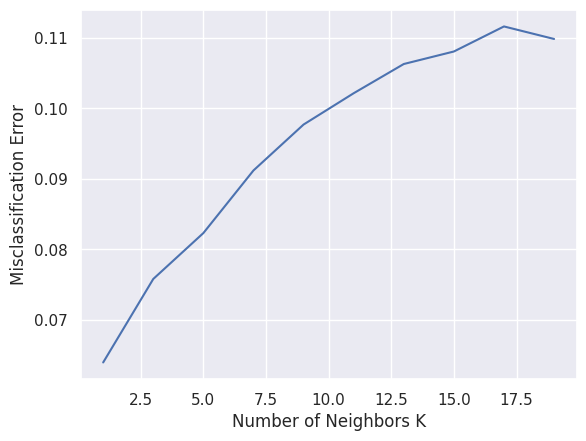

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier

knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Performance Matrix on train data set
ytrain_predict_knn5 = knn5.predict(X_train)
print("accuracy for training dataset:",knn5.score(X_train, y_train))

print("confusion matrix for training dataset")
print(confusion_matrix(y_train, ytrain_predict_knn5))

print("classification report for training dataset")
print(classification_report(y_train, ytrain_predict_knn5))

accuracy for training dataset: 0.9545800558233951
confusion matrix for training dataset
[[6432  123]
 [ 235 1092]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6555
           1       0.90      0.82      0.86      1327

    accuracy                           0.95      7882
   macro avg       0.93      0.90      0.92      7882
weighted avg       0.95      0.95      0.95      7882



In [ ]:
# Performance Matrix on test data set
ytest_predict_knn5 = knn5.predict(X_test)
print("accuracy score for testing dataset:",knn5.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(confusion_matrix(y_test, ytest_predict_knn5))

print("classification report for testing dataset")
print(classification_report(y_test, ytest_predict_knn5))

accuracy score for testing dataset: 0.9177027827116637
confusion matrix for testing dataset
[[2715   94]
 [ 184  385]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2809
           1       0.80      0.68      0.73       569

    accuracy                           0.92      3378
   macro avg       0.87      0.82      0.84      3378
weighted avg       0.91      0.92      0.91      3378



In [ ]:
0.9545800558233951 - 0.9177027827116637

0.03687727311173139

AUC score and ROC curve for training dataset
AUC: 0.986


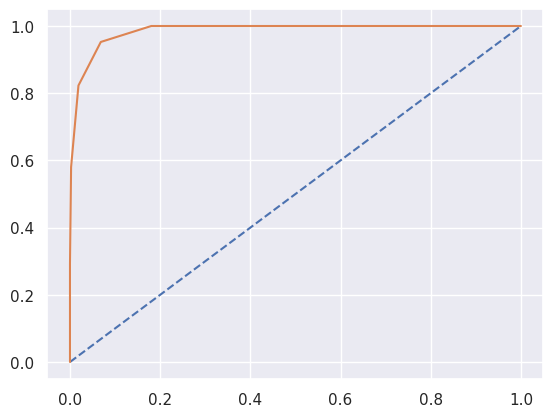

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = knn5.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.941


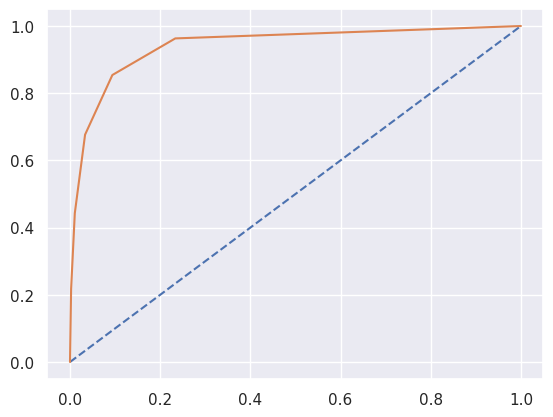

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = knn5.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for training dataset")
scores_knn5_train = cross_val_score(knn5, X_train, y_train, cv=10)
scores_knn5_train

cross validation scores for training dataset


array([0.89607098, 0.92141952, 0.91116751, 0.90989848, 0.91116751,
       0.90609137, 0.90228426, 0.92639594, 0.91243655, 0.91370558])

In [ ]:
print("cross validation scores for testing dataset")
scores_knn5_test = cross_val_score(knn5, X_test, y_test, cv=10)
scores_knn5_test

cross validation scores for testing dataset


array([0.88757396, 0.85798817, 0.85798817, 0.88461538, 0.89349112,
       0.87278107, 0.88461538, 0.88461538, 0.83976261, 0.87240356])

# Building KNN model using GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']

}

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [ ]:
#fitting gridsearchCV into training dataset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [ ]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [ ]:
ytrain_predict_knncv = best_grid.predict(X_train)
ytest_predict_knncv = best_grid.predict(X_test)

In [ ]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 1.0


In [ ]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.9547069271758437


In [ ]:
#getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_knncv))

Classification report for train dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [ ]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_knncv))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.90      0.82      0.86       569

    accuracy                           0.95      3378
   macro avg       0.93      0.90      0.92      3378
weighted avg       0.95      0.95      0.95      3378



In [ ]:
#confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, ytrain_predict_knncv)

confusuon matrix for training dataset


array([[6555,    0],
       [   0, 1327]])

In [ ]:
#confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_knncv)

confusuon matrix for testing dataset


array([[2757,   52],
       [ 101,  468]])

AUC score and ROC curve for training dataset
AUC: 1.000


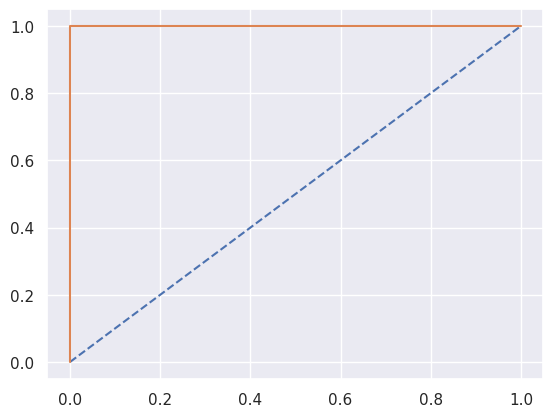

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.979


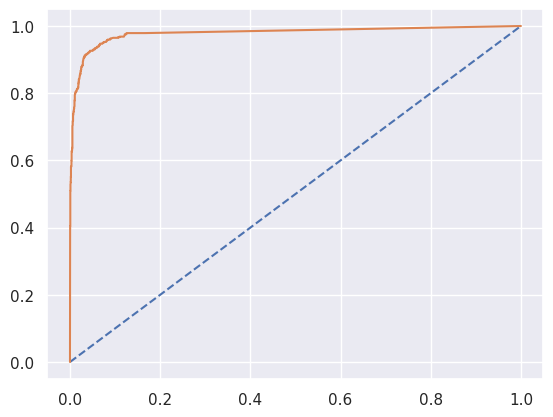

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_knncv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_knncv_train

cross validation scores for train dataset


array([0.93789607, 0.95437262, 0.95939086, 0.95431472, 0.95812183,
       0.96573604, 0.94162437, 0.96700508, 0.95304569, 0.95939086])

In [ ]:
print("cross validation scores for test dataset")
scores_knncv_test = cross_val_score(best_grid, X_test, y_test, cv=10)
scores_knncv_test

cross validation scores for test dataset


array([0.90828402, 0.8816568 , 0.89940828, 0.90236686, 0.9260355 ,
       0.91420118, 0.93195266, 0.91715976, 0.90207715, 0.9347181 ])

# Building KNN model over balanced dataset using SMOTE

In [ ]:
#fitting model into training dataset
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
# predict on train and test data set with balanced dataset
ytrain_predict_knnsm = knn.predict(X_train_res) # can compare with y_train
ytest_predict_knnsm = knn.predict(X_test) # can compare with y_test

In [ ]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",knn.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.8931350114416476


In [ ]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",knn.score(X_test, y_test))

Accuracy of testing dataset: 0.8001776198934281


In [ ]:
#getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_knnsm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      6555
           1       0.83      0.99      0.90      6555

    accuracy                           0.89     13110
   macro avg       0.91      0.89      0.89     13110
weighted avg       0.91      0.89      0.89     13110



In [ ]:
#getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_knnsm))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      2809
           1       0.45      0.91      0.60       569

    accuracy                           0.80      3378
   macro avg       0.71      0.84      0.74      3378
weighted avg       0.89      0.80      0.82      3378



In [ ]:
#confusion matrix for train dataset
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_knnsm)

confusion matrix for training dataset


array([[5230, 1325],
       [  76, 6479]])

In [ ]:
#confusion matrix for test dataset
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_knnsm)

confusion matrix for testing dataset


array([[2188,  621],
       [  54,  515]])

AUC score and ROC curve for training dataset
AUC: 0.984


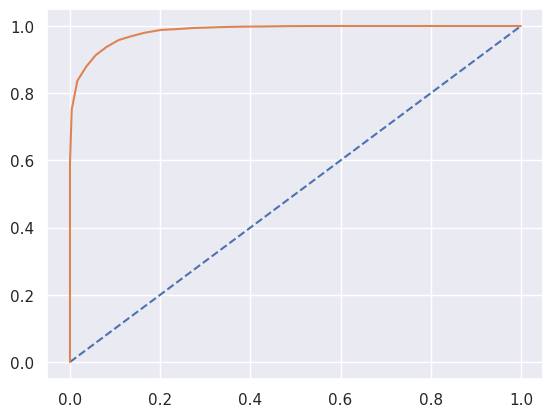

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = knn.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.928


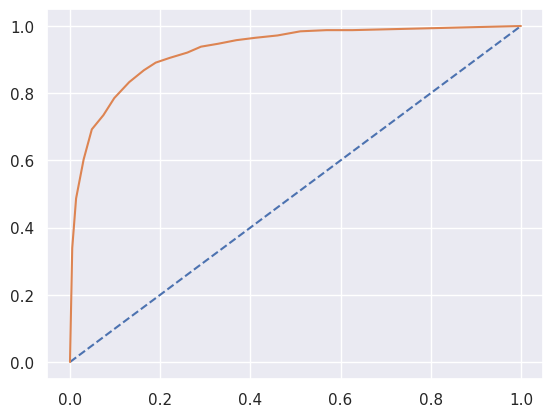

In [ ]:
#creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_knnsm_train = cross_val_score(knn, X_train_res, y_train_res, cv=10)
scores_knnsm_train

cross validation scores for train dataset


array([0.86575133, 0.85583524, 0.90541571, 0.86956522, 0.8733791 ,
       0.8863463 , 0.87795576, 0.88024409, 0.86880244, 0.89016018])

In [ ]:
print("cross validation scores for test dataset")
scores_knnsm_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knnsm_test

cross validation scores for test dataset


array([0.88757396, 0.84319527, 0.84023669, 0.86390533, 0.87869822,
       0.87573964, 0.87573964, 0.87573964, 0.84866469, 0.88724036])

# Building Gaussian Naive Bayes¶

In [ ]:
#importing libraries to build NB model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
# fitting NB model into training dataset
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#predicting and checking accoracy on training dataset
ytrain_predict_nb = nb.predict(X_train)
print("Accracy of training dataset:", nb.score(X_train, y_train))

Accracy of training dataset: 0.7854605430093885


In [ ]:
#getting confusion matirx and classification report for training dataset
print("Confusion matrix of train dataset")
print(confusion_matrix(y_train, ytrain_predict_nb)) ## confusion_matrix

#print("Classification report of train dataset")
print(classification_report(y_train, ytrain_predict_nb))

Confusion matrix of train dataset
[[5240 1315]
 [ 376  951]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      6555
           1       0.42      0.72      0.53      1327

    accuracy                           0.79      7882
   macro avg       0.68      0.76      0.70      7882
weighted avg       0.85      0.79      0.81      7882



In [ ]:
#predicting and getting accuracy score for testing dataset
ytest_predict_nb = nb.predict(X_test)
print("Accracy of testing dataset:", nb.score(X_test, y_test))

Accracy of testing dataset: 0.7818235642391947


In [ ]:
#printing confusuon matix and classification report for testing datatset
print("Confusion matrix of test dataset")
print(confusion_matrix(y_test, ytest_predict_nb))         ## confusion_matrix
print("Classification report of test dataset")
print(classification_report(y_test, ytest_predict_nb))    ## classification_report

Confusion matrix of test dataset
[[2234  575]
 [ 162  407]]
Classification report of test dataset
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2809
           1       0.41      0.72      0.52       569

    accuracy                           0.78      3378
   macro avg       0.67      0.76      0.69      3378
weighted avg       0.85      0.78      0.80      3378



AUC score and ROC curve for training dataset
AUC: 0.827


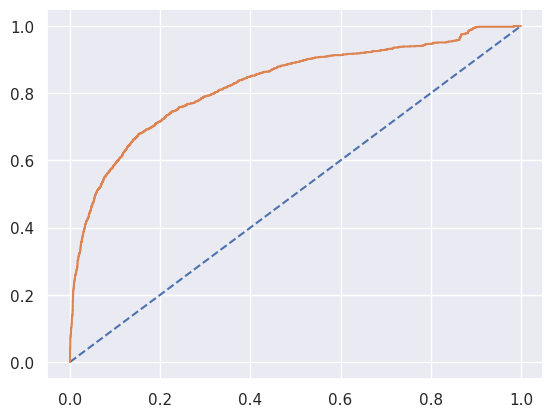

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.810


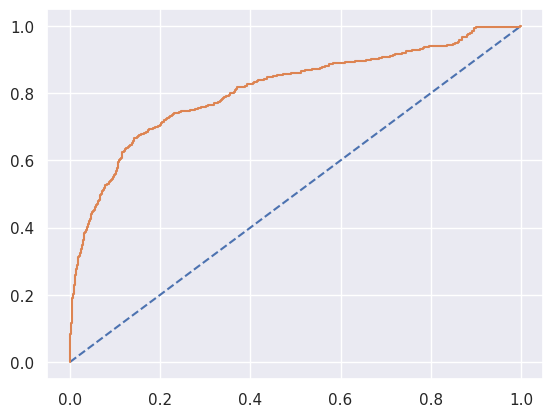

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_nb_train = cross_val_score(nb, X_train, y_train, cv=10)
scores_nb_train

cross validation scores for train dataset


array([0.76299113, 0.7896071 , 0.76395939, 0.79187817, 0.7677665 ,
       0.79187817, 0.80203046, 0.77918782, 0.79187817, 0.80329949])

In [ ]:
print("cross validation scores for test dataset")
scores_nb_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nb_test

cross validation scores for test dataset


array([0.80473373, 0.73668639, 0.72781065, 0.81065089, 0.76331361,
       0.78402367, 0.76627219, 0.80769231, 0.71513353, 0.78635015])

## Building Gaussian Naive Bayes over balanced data using SMOTE

In [ ]:
#fitting NB model into balanced training dataset
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

GaussianNB()

In [ ]:
#predicting and checking accoracy on training dataset
ytrain_predict_nbsm = nb.predict(X_train_res)
print("Accracy of training dataset:", nb.score(X_train_res, y_train_res))

Accracy of training dataset: 0.736231884057971


In [ ]:
#getting confusion matirx and classification report for training dataset
print("Confusion matrix of train dataset")
print(confusion_matrix(y_train_res, ytrain_predict_nbsm)) ## confusion_matrix

#print("Classification report of train dataset")
print(classification_report(y_train_res, ytrain_predict_nbsm))     ## classification_report

Confusion matrix of train dataset
[[3970 2585]
 [ 873 5682]]
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      6555
           1       0.69      0.87      0.77      6555

    accuracy                           0.74     13110
   macro avg       0.75      0.74      0.73     13110
weighted avg       0.75      0.74      0.73     13110



In [ ]:
#predicting and getting accuracy score for testing dataset
ytest_predict_nbsm = nb.predict(X_test)
print("Accracy of testing dataset:", nb.score(X_test, y_test))

Accracy of testing dataset: 0.6397276494967437


In [ ]:
#printing confusuon matix and classification report for testing datatset
print("Confusion matrix of test dataset")
print(confusion_matrix(y_test, ytest_predict_nbsm))         ## confusion_matrix
print("Classification report of test dataset")
print(classification_report(y_test, ytest_predict_nbsm))    ## classification_report

Confusion matrix of test dataset
[[1683 1126]
 [  91  478]]
Classification report of test dataset
              precision    recall  f1-score   support

           0       0.95      0.60      0.73      2809
           1       0.30      0.84      0.44       569

    accuracy                           0.64      3378
   macro avg       0.62      0.72      0.59      3378
weighted avg       0.84      0.64      0.68      3378



AUC score and ROC curve for training dataset
AUC: 0.837


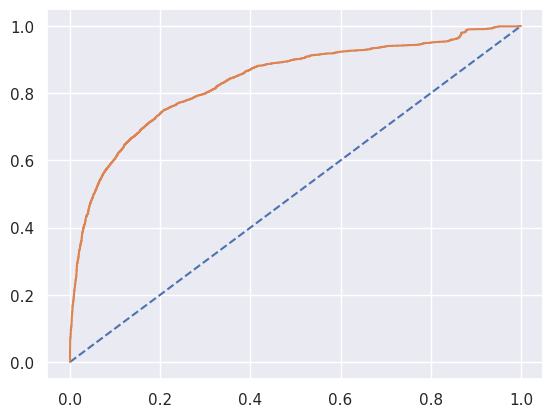

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = nb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.809


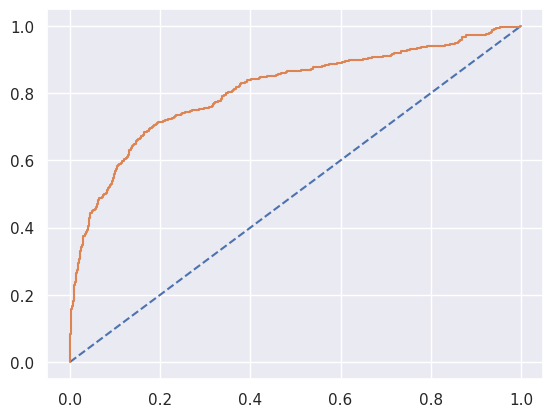

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_nbsm_train = cross_val_score(nb, X_train_res, y_train_res, cv=10)
scores_nbsm_train

cross validation scores for train dataset


array([0.72158658, 0.72234935, 0.74065599, 0.74141876, 0.72158658,
       0.74065599, 0.75133486, 0.71700992, 0.74599542, 0.75591152])

In [ ]:
print("cross validation scores for test dataset")
scores_nbsm_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nbsm_test

cross validation scores for test dataset


array([0.80473373, 0.73668639, 0.72781065, 0.81065089, 0.76331361,
       0.78402367, 0.76627219, 0.80769231, 0.71513353, 0.78635015])

# Ensemble Model-Random Forest

In [ ]:
# building rando forect model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# Performance Matrix on train data set
ytrain_predict_rf = rf.predict(X_train)
print("accuracy score for training dataset:",rf.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_rf))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_rf))

accuracy score for training dataset: 1.0
confusion matrix for training dataset
[[6555    0]
 [   0 1327]]
classification report for training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [ ]:
# Performance Matrix on test data set
ytest_predict_rf = rf.predict(X_test)
print("accuracy score for testing dataset:",rf.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rf))

print("classification report for testing dataste")
print(metrics.classification_report(y_test, ytest_predict_rf))

accuracy score for testing dataset: 0.9742451154529307
confusion matrix for testing dataset
[[2794   15]
 [  72  497]]
classification report for testing dataste
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.97      0.87      0.92       569

    accuracy                           0.97      3378
   macro avg       0.97      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378



AUC score and ROC curve for training dataset
AUC: 0.825


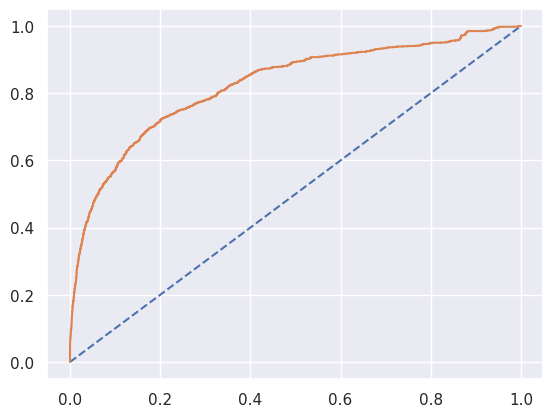

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.809


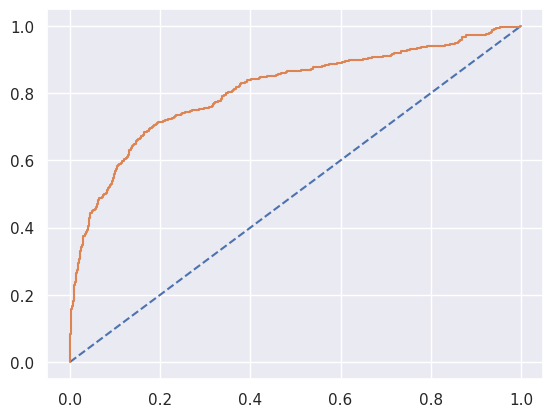

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Building random forest model over balanced dataset

In [ ]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=1)

In [ ]:
#Performance Matrix on train data set
ytrain_predict_rfsm = rf.predict(X_train_res)
print("accuracy score for training dataset:",rf.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_rfsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_rfsm))

accuracy score for training dataset: 1.0
confusion matrix for training dataset
[[6555    0]
 [   0 6555]]
classification report for training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [ ]:
#Performance Matrix on test data set
ytest_predict_rfsm = rf.predict(X_test)
print("accuracy score for testing dataset:",rf.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rfsm))

print("classification report for testing dataste")
print(metrics.classification_report(y_test, ytest_predict_rfsm))

accuracy score for testing dataset: 0.9748371817643576
confusion matrix for testing dataset
[[2791   18]
 [  67  502]]
classification report for testing dataste
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2809
           1       0.97      0.88      0.92       569

    accuracy                           0.97      3378
   macro avg       0.97      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378



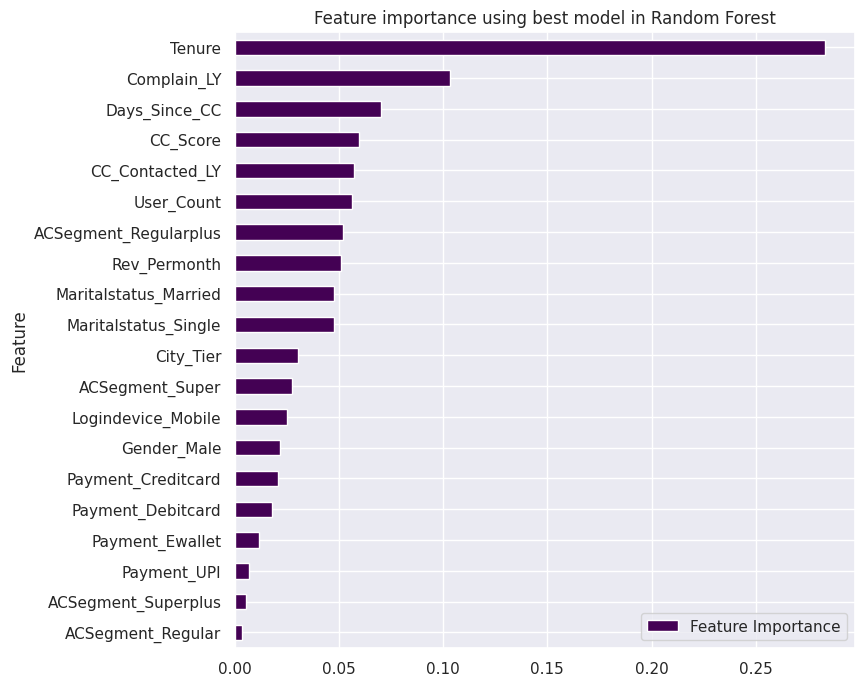

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'rf' is your fitted RandomForest model
importances = rf.feature_importances_
feature_names = X_train_res.columns  # Assuming X_train_res is your training data

# Create a DataFrame for feature importances
df_importances = pd.DataFrame({'Feature': feature_names, 'Feature Importance': importances})
df_importances = df_importances.sort_values(by='Feature Importance')

df_importances.plot(kind='barh', x='Feature', y='Feature Importance', colormap='viridis', figsize=(8, 8))
plt.title("Feature importance using best model in Random Forest")
plt.show()


# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bagging=BaggingClassifier(base_estimator=rf,random_state=1)
Bagging.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [ ]:
#Performance Matrix on train data set
ytrain_predict_bagging = Bagging.predict(X_train)
print("accuracy score or training dataset:",Bagging.score(X_train, y_train))

print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_bagging))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_bagging))

accuracy score or training dataset: 0.9954326313118498
confusion report for training dataset
[[6552    3]
 [  33 1294]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6555
           1       1.00      0.98      0.99      1327

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882



In [ ]:
# Performance Matrix on test data set
ytest_predict_bagging = Bagging.predict(X_test)
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))

print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging))

Accuracy score for testing datatset: 0.9641799881586738
confusuion matrix for testing dataset
[[2792   17]
 [ 104  465]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2809
           1       0.96      0.82      0.88       569

    accuracy                           0.96      3378
   macro avg       0.96      0.91      0.93      3378
weighted avg       0.96      0.96      0.96      3378



AUC score and ROC curve for training dataset
AUC: 1.000


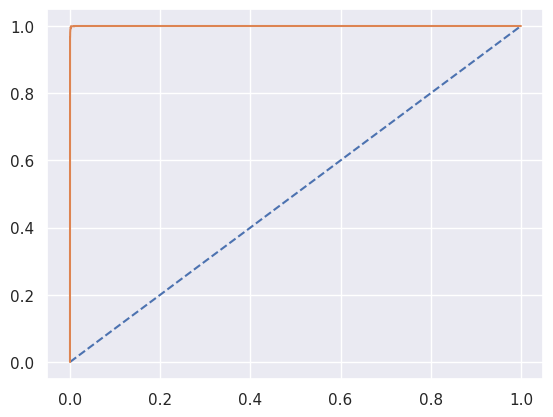

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = Bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.990


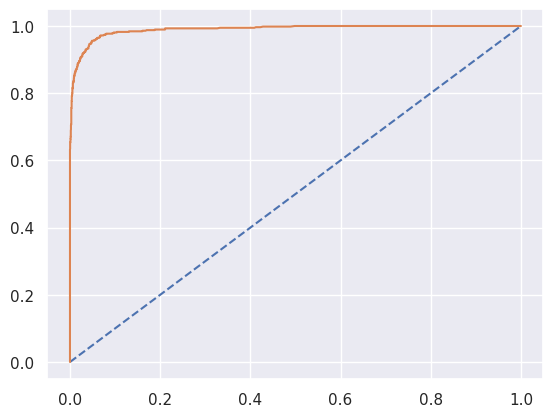

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_bagging_train = cross_val_score(Bagging, X_train, y_train, cv=10)
scores_bagging_train

cross validation scores for train dataset


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

array([0.95690748, 0.97338403, 0.96954315, 0.95939086, 0.96192893,
       0.97208122, 0.94923858, 0.9606599 , 0.95939086, 0.95812183])

In [ ]:
print("cross validation scores for test dataset")
scores_bagging_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_test

cross validation scores for test dataset


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

array([0.94674556, 0.91420118, 0.91715976, 0.9408284 , 0.92307692,
       0.93786982, 0.9260355 , 0.93195266, 0.91691395, 0.94065282])

# Bagging on balanced dataset

In [ ]:
Bagging.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [ ]:
# Performance Matrix on train data set
ytrain_predict_bagging_sm = Bagging.predict(X_train_res)
print("accuracy score or training dataset:",Bagging.score(X_train_res, y_train_res))

print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_bagging_sm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_bagging_sm))

accuracy score or training dataset: 0.998093058733791
confusion report for training dataset
[[6547    8]
 [  17 6538]]
classification report for training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [ ]:
# Performance Matrix on test data set
ytest_predict_bagging_sm= Bagging.predict(X_test)
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))

print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging_sm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging_sm))

Accuracy score for testing datatset: 0.9656601539372409
confusuion matrix for testing dataset
[[2771   38]
 [  78  491]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.93      0.86      0.89       569

    accuracy                           0.97      3378
   macro avg       0.95      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378



AUC score and ROC curve for training dataset
AUC: 1.000


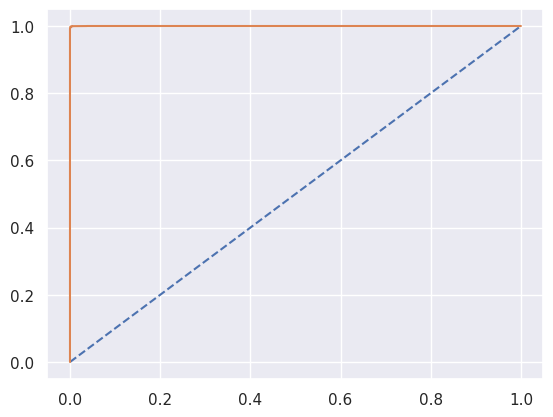

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = Bagging.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.988


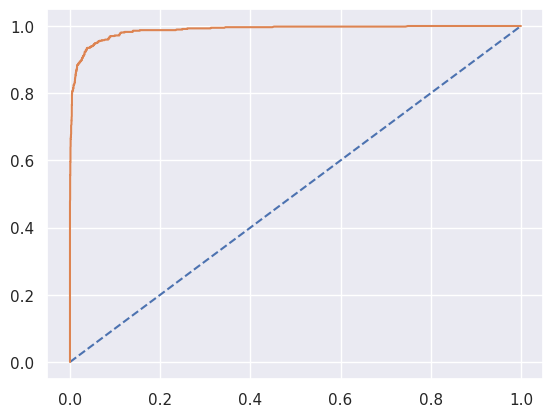

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_bagging_sm_train = cross_val_score(Bagging, X_train_res, y_train_res, cv=10)
scores_bagging_sm_train

cross validation scores for train dataset


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

array([0.93897788, 0.94050343, 0.99237223, 0.99313501, 0.98855835,
       0.98855835, 0.98932113, 0.99160946, 0.99237223, 0.99237223])

In [ ]:
print("cross validation scores for test dataset")
scores_bagging_sm_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_sm_test

cross validation scores for test dataset


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

array([0.94674556, 0.91420118, 0.91715976, 0.9408284 , 0.92307692,
       0.93786982, 0.9260355 , 0.93195266, 0.91691395, 0.94065282])

# Ada-Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


adb = AdaBoostClassifier(random_state=1)
adb.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
# Performance Matrix on train data set
ytrain_predict_adb = adb.predict(X_train)

print("Accuracy for training dataset:",adb.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_adb))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_adb))

Accuracy for training dataset: 0.8987566607460036
confusion matrix for training dataset
[[6276  279]
 [ 519  808]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.74      0.61      0.67      1327

    accuracy                           0.90      7882
   macro avg       0.83      0.78      0.80      7882
weighted avg       0.89      0.90      0.89      7882



In [ ]:
# Performance Matrix on test data set
ytest_predict_adb = adb.predict(X_test)
print("accuracy score for testing dataset:",adb.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_adb))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_adb))

accuracy score for testing dataset: 0.8996447602131439
confusion matrix for testing dataset
[[2698  111]
 [ 228  341]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.75      0.60      0.67       569

    accuracy                           0.90      3378
   macro avg       0.84      0.78      0.80      3378
weighted avg       0.89      0.90      0.89      3378



AUC score and ROC curve for training dataset
AUC: 0.915


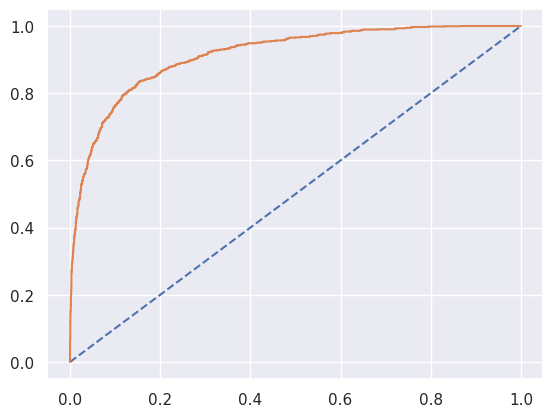

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = adb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.903


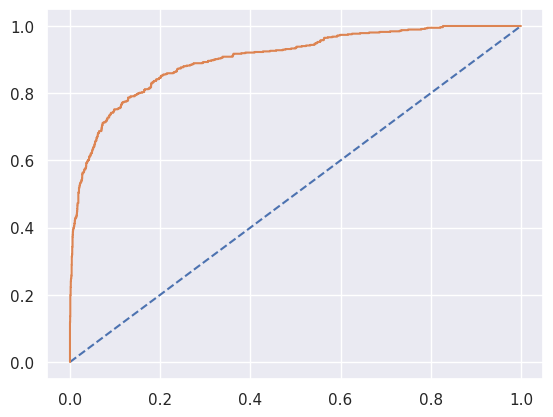

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_adb_train = cross_val_score(adb, X_train, y_train, cv=10)
scores_adb_train

cross validation scores for train dataset


array([0.86311787, 0.90367554, 0.90736041, 0.91243655, 0.89340102,
       0.89086294, 0.88832487, 0.89847716, 0.89720812, 0.90482234])

In [ ]:
print("cross validation scores for test dataset")
scores_adb_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_test

cross validation scores for test dataset


array([0.9408284 , 0.85502959, 0.86390533, 0.9112426 , 0.90236686,
       0.88757396, 0.90532544, 0.90828402, 0.884273  , 0.90207715])

# Ada-Boost on balanced dataset

In [ ]:
adb.fit(X_train_res,y_train_res)

AdaBoostClassifier(random_state=1)

In [ ]:
# Performance Matrix on train data set
ytrain_predict_adbsm = adb.predict(X_train_res)

print("Accuracy for training dataset:",adb.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_adbsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_adbsm))

Accuracy for training dataset: 0.9082379862700228
confusion matrix for training dataset
[[5961  594]
 [ 609 5946]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6555
           1       0.91      0.91      0.91      6555

    accuracy                           0.91     13110
   macro avg       0.91      0.91      0.91     13110
weighted avg       0.91      0.91      0.91     13110



In [ ]:
#Performance Matrix on test data set
ytest_predict_adbsm = adb.predict(X_test)
print("accuracy score for testing dataset:",adb.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_adbsm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_adbsm))

accuracy score for testing dataset: 0.8783303730017762
confusion matrix for testing dataset
[[2552  257]
 [ 154  415]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2809
           1       0.62      0.73      0.67       569

    accuracy                           0.88      3378
   macro avg       0.78      0.82      0.80      3378
weighted avg       0.89      0.88      0.88      3378



AUC score and ROC curve for training dataset
AUC: 0.967


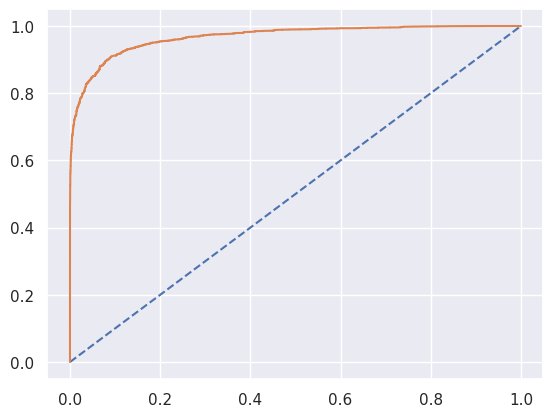

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = adb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.901


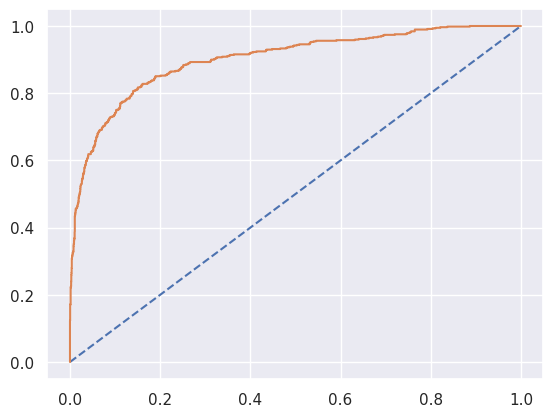

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_adb_sm_train = cross_val_score(adb, X_train_res, y_train_res, cv=10)
scores_adb_sm_train

cross validation scores for train dataset


array([0.80549199, 0.81083143, 0.92372235, 0.93058734, 0.92677346,
       0.91914569, 0.91685736, 0.91990847, 0.91914569, 0.92143402])

In [ ]:
print("cross validation scores for test dataset")
scores_adb_sm_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_sm_test

cross validation scores for test dataset


array([0.9408284 , 0.85502959, 0.86390533, 0.9112426 , 0.90236686,
       0.88757396, 0.90532544, 0.90828402, 0.884273  , 0.90207715])

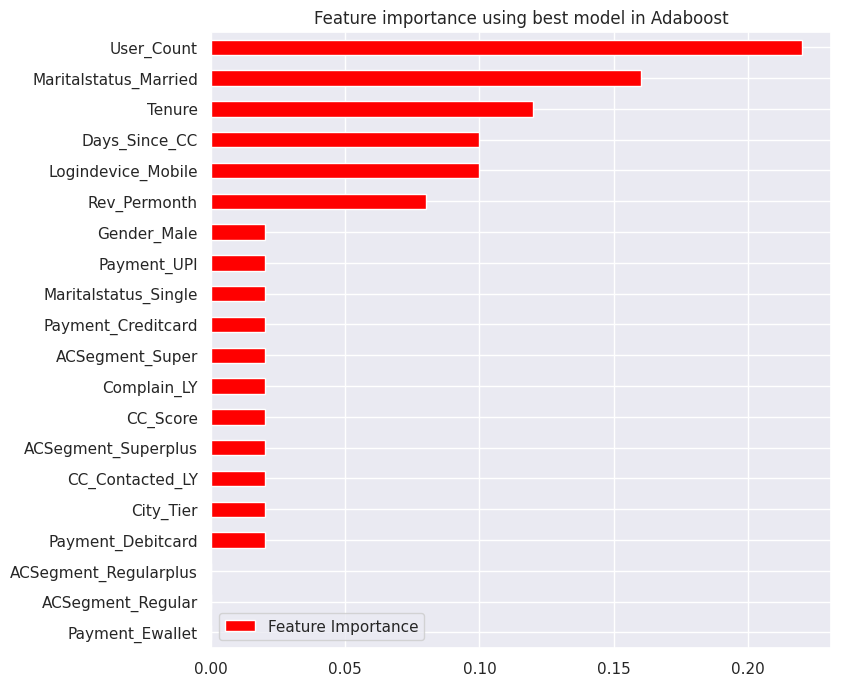

In [ ]:
# Assuming 'adb' is your trained Adaboost model
importances = adb.feature_importances_
feature_names = X_train_res.columns  # Assuming X_train_res is your training data

df = pd.DataFrame({'Feature Importance': importances}, index=feature_names)
df = df.sort_values(by='Feature Importance')

my_colors = ['red','green','blue','black','orange','cyan','magenta','brown']
df.plot(kind='barh', color=my_colors, figsize=(8,8))
plt.title("Feature importance using best model in Adaboost")
plt.show();

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#Performance Matrix on train data set
ytrain_predict_gb = gb.predict(X_train)
print("accuracy for training dataset:", gb.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_gb))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_gb))

accuracy for training dataset: 0.9222278609489977
confusion matrix for training dataset
[[6378  177]
 [ 436  891]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6555
           1       0.83      0.67      0.74      1327

    accuracy                           0.92      7882
   macro avg       0.89      0.82      0.85      7882
weighted avg       0.92      0.92      0.92      7882



In [ ]:
#Performance Matrix on test data set
ytest_predict_gb = gb.predict(X_test)
print("accuracy score for testing dataset:", gb.score(X_test, y_test))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_gb))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_gb))

accuracy score for testing dataset: 0.911190053285968
confusuon matrix for testing dataset
[[2730   79]
 [ 221  348]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2809
           1       0.81      0.61      0.70       569

    accuracy                           0.91      3378
   macro avg       0.87      0.79      0.82      3378
weighted avg       0.91      0.91      0.91      3378



AUC score and ROC curve for training dataset
AUC: 0.948


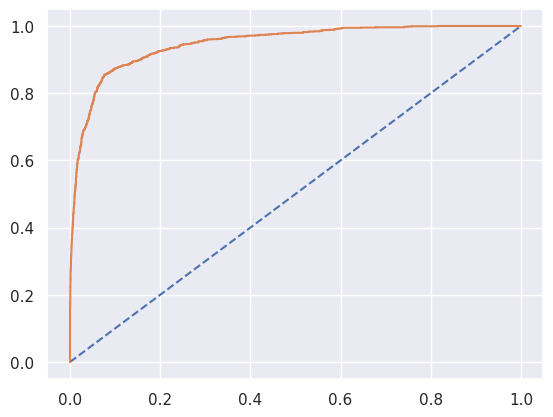

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = gb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.927


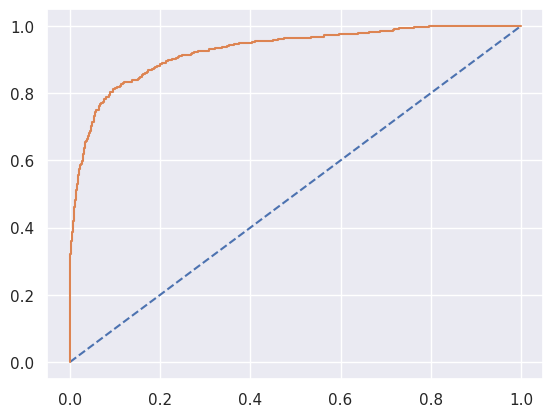

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_gb_train = cross_val_score(gb, X_train, y_train, cv=10)
scores_gb_train

cross validation scores for train dataset


array([0.89607098, 0.91508238, 0.92385787, 0.91624365, 0.90736041,
       0.91497462, 0.89593909, 0.92005076, 0.90736041, 0.92005076])

In [ ]:
print("cross validation scores for test dataset")
scores_gb_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_test

cross validation scores for test dataset


array([0.9260355 , 0.89053254, 0.88757396, 0.91420118, 0.89053254,
       0.90236686, 0.90828402, 0.9112426 , 0.88130564, 0.91988131])

# Gradient Boosting on balanced dataset

In [ ]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Performance Matrix on train data set
ytrain_predict_gbsm = gb.predict(X_train_res)
print("accuracy for training dataset:", gb.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_gbsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_gbsm))

accuracy for training dataset: 0.9399694889397406
confusion matrix for training dataset
[[6203  352]
 [ 435 6120]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6555
           1       0.95      0.93      0.94      6555

    accuracy                           0.94     13110
   macro avg       0.94      0.94      0.94     13110
weighted avg       0.94      0.94      0.94     13110



In [ ]:
# Performance Matrix on test data set
ytest_predict_gbsm = gb.predict(X_test)
print("accuracy score for testing dataset:", gb.score(X_test, y_test))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_gbsm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_gbsm))

accuracy score for testing dataset: 0.9073416222616933
confusuon matrix for testing dataset
[[2657  152]
 [ 161  408]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2809
           1       0.73      0.72      0.72       569

    accuracy                           0.91      3378
   macro avg       0.84      0.83      0.83      3378
weighted avg       0.91      0.91      0.91      3378



AUC score and ROC curve for training dataset
AUC: 0.984


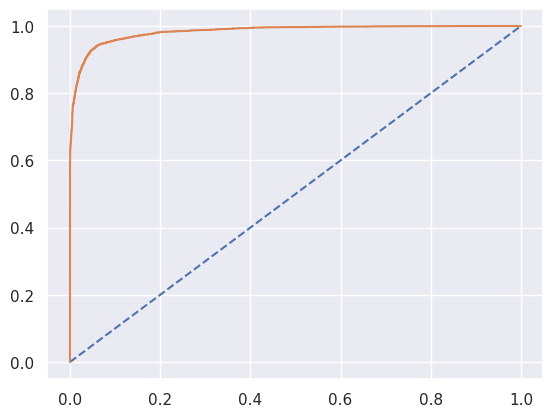

In [ ]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs = gb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.919


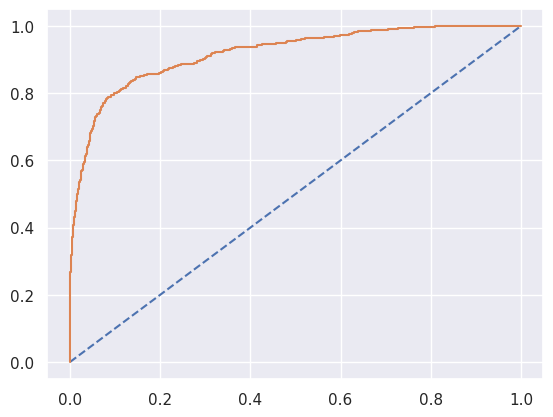

In [ ]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
print("cross validation scores for train dataset")
scores_gb_sm_train = cross_val_score(gb, X_train_res, y_train_res, cv=10)
scores_gb_sm_train

cross validation scores for train dataset


array([0.83371472, 0.83142639, 0.95194508, 0.95728452, 0.96033562,
       0.94965675, 0.94736842, 0.95881007, 0.95499619, 0.96338673])

In [ ]:
print("cross validation scores for test dataset")
scores_gb_sm_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_sm_test

cross validation scores for test dataset


array([0.9260355 , 0.89053254, 0.88757396, 0.91420118, 0.89053254,
       0.90236686, 0.90828402, 0.9112426 , 0.88130564, 0.91988131])

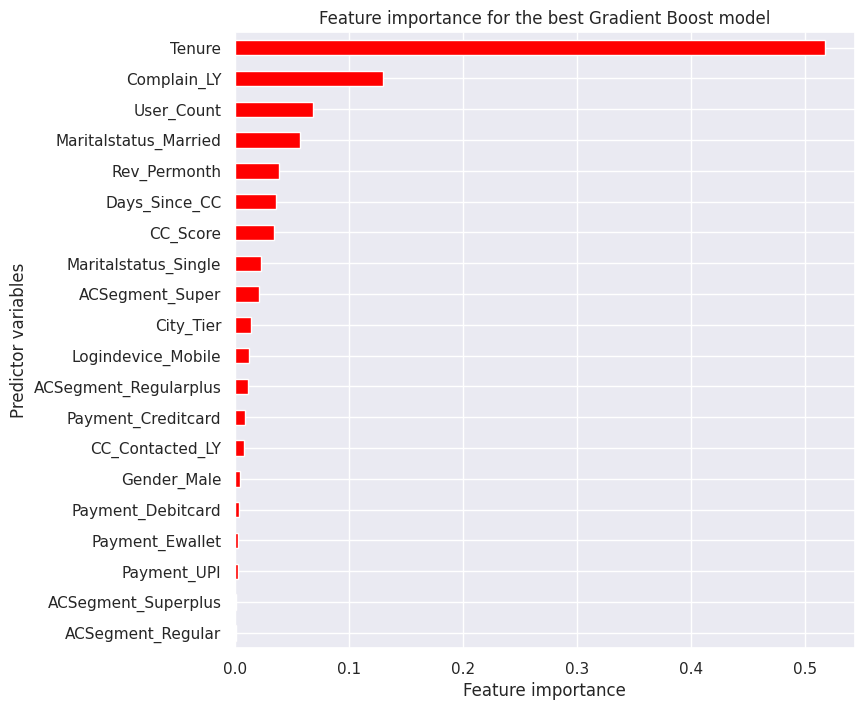

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

# Calculate feature importances from your Gradient Boosting model (assuming 'gb' is your fitted model)
gb_importance = pd.DataFrame({'importance': gb.feature_importances_}, index=X_train_res.columns)

# Sort the feature importances
gb_importance = gb_importance.sort_values(by='importance')

# Correct the color assignment
my_colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']  # or any other color list

# Ensure the length of my_colors matches the number of features
if len(my_colors) < len(gb_importance):
    import itertools
    my_colors = list(itertools.islice(itertools.cycle(my_colors), len(gb_importance)))

# Plotting
gb_importance.plot(kind='barh', color=my_colors, figsize=(8, 8), legend=None)
plt.title("Feature importance for the best Gradient Boost model")
plt.xlabel("Feature importance")
plt.ylabel("Predictor variables")
plt.show()


# THE END